In [192]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import seaborn as sns

df = pd.read_csv('statement.CSV')
df = df.drop(['Memo'],axis=1)
print(df.head())
lists = []
amount = [amount1,amount2,amount3,amount4,amount5]
amount = [0,0,0,0,0]

  Transaction Date   Post Date            Description      Category  Type  \
0       11/09/2021  11/10/2021  DD DOORDASH BB.QCHICK  Food & Drink  Sale   
1       11/09/2021  11/10/2021  DD DOORDASH SHINCHONS  Food & Drink  Sale   
2       11/09/2021  11/10/2021          CHIPOTLE 0913  Food & Drink  Sale   
3       11/08/2021  11/09/2021   Amazon.com*Q834H34N3      Shopping  Sale   
4       11/08/2021  11/09/2021  DD DOORDASH BCDTOFUHO  Food & Drink  Sale   

   Amount  
0  -42.15  
1  -18.68  
2  -11.44  
3  -37.21  
4  -19.73  


In [193]:
def remove_noise(txt, delimiter = []):
    tks = word_tokenize(txt)
    cleaned = []
    for tk in tks:
        tk = re.sub('[^A-Za-z0-9]+','',tk)
        if len(tk) > 1 and tk.lower() not in delimiter:
            cleaned.append(tk.lower())
    return cleaned
  
for element in df['Description']:
    templists = remove_noise(element)
    for x in range(len(templists)):
        lists.append(templists[x])
        


In [194]:
# construct a new dataframe from value_counts() where counts is larger than 
newdf = pd.DataFrame(lists).value_counts().loc[lambda x : x>3].rename_axis('Name').reset_index(name='Counts')
# drop equivalents such as amzn = mktp, hopefully we can do this process with an NLP algorithm
newdf = newdf.drop(newdf.index[[0,2,3,7,9,10]])
# reset the index
newdf = newdf.reset_index(drop = True)
newdf

,Name,Counts
0,doordash,22
1,amzn,10
2,ralphs,4
3,chipotle,4
4,pokeme,4


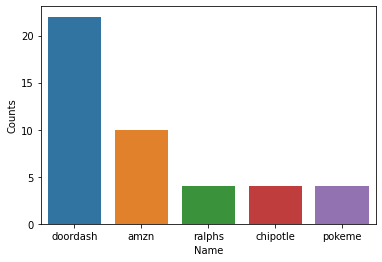

In [195]:
# a bar graph to start us off!
# we get that doordash has the highest number of orders, but we didn't consider how much each charge is yet.
ax = sns.barplot(x="Name", y="Counts", data=newdf)

In [196]:
# for each vendor name in newdf, I want to sum the price($) of the itemized charge that matches the string value.
# for instance, if rows 20,25, and 66 contains the string 'DOORDASH', then I'll add the respective prices from those,
# sum the charges from rows 20, 25, and 66 then divide by 3 to compute the average for that category.
for i in range(len(newdf)):
    for j in range(len(df[df['Description'].str.contains(newdf['Name'].iloc[i].upper())])):
        amount[i] += df[df['Description'].str.contains(newdf['Name'].iloc[i].upper())]['Amount'].iloc[j]
    amount[i] = abs(amount[i])
    amount[i] = amount[i]/len(df[df['Description'].str.contains(newdf['Name'].iloc[i].upper())]['Amount'].index)
    amount[i] = round(amount[i])

In [197]:
newdf = newdf.reset_index(drop = True)
for i in range(len(newdf)):
    newdf.loc[i,'Counts'] = newdf['Counts'].iloc[i]*amount[i]

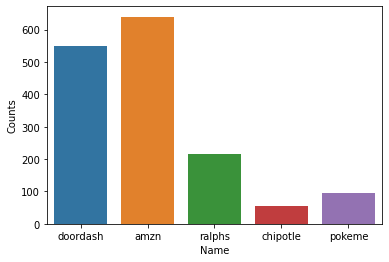

In [198]:
# now we have the weighted distribution of each charge, leading to the conclusion that Amazon orders actually have
# the highest distribution!
ax = sns.barplot(x="Name", y="Counts", data=newdf)